<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/insurancemodel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing the data normalization and standarization
* Use normalization when the distribution of your data doesn't follow a Gaussian (normal) distribution, or when you want to scale the features to a specific range.Example: If you have features like pixel values in an image (ranging from 0 to 255), you might normalize them to a range between 0 and 1 to ensure that they're within a consistent range.

* Use standardization when the features in your dataset have different scales and units of measurement.Example: If you have features like age, income, and height, which are measured in different units, you would typically standardize them to ensure they have a consistent scale.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [29]:
ct = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), ['age', 'bmi', 'children']),  # tuple for MinMaxScaler transformation
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])  # tuple for OneHotEncoder transformation
    ],
    remainder='passthrough'  # Pass through any remaining columns
)


# Create x and y

In [30]:
x=insurance.drop('charges',axis=1)
y=insurance.charges

# Spliting the data

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Checking the split

In [32]:
print('Number of total samples in features:', len(x))
print('Number of samples in training features:', len(x_train))
print('Number of samples in testing features:', len(x_test))
print('Number of total samples in labels:', len(y))
print('Number of samples in training labels:', len(y_train))
print('Number of samples in testing labels:', len(y_test))


Number of total samples in features: 1338
Number of samples in training features: 1070
Number of samples in testing features: 268
Number of total samples in labels: 1338
Number of samples in training labels: 1070
Number of samples in testing labels: 268


# Fit the Coulumn transoformer

In [33]:
fiter = ct.fit(x_train)
x_train_normal = fiter.transform(x_train)
x_test_normal = fiter.transform(x_test)

In [38]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [39]:
print(x_train_normal[0])  # View the first 5 rows of the NumPy array

[0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ]


# Creating the neural network model

In [50]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,name='inputlayer'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1,name='outputlayer')
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=['mae']
             )

history=model.fit(x_train_normal,y_train,epochs=500,verbose=0)

# Evaluating the Model

In [51]:
model.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3177.7092 - mae: 3177.7092


[3177.709228515625, 3177.709228515625]

# Ploting the history variable

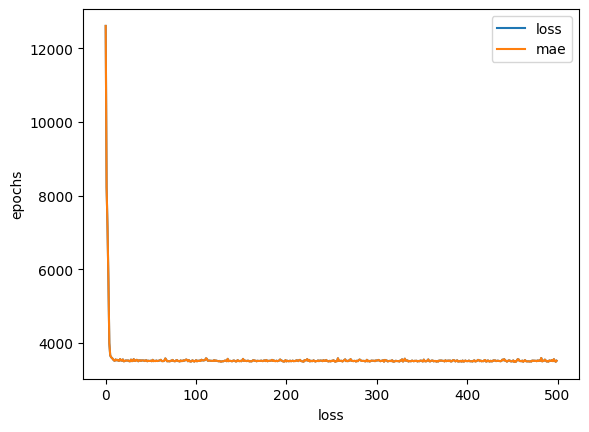

In [56]:
history_df=pd.DataFrame(history.history)
history_df.plot()
plt.xlabel('loss')
plt.ylabel('epochs')
plt.show()